In [22]:
import pandas as pd 
import numpy as np 
import nltk
import re
from nltk.corpus import stopwords
import matplotlib.pyplot as plt 
import plotly.express as px
# from wordcloud import WordCloud, STOPWORDS 
# from wordcloud import STOPWORDS
# from collections import Counter 
# from textblob import TextBlob
# stopwords = set(STOPWORDS) 
import pickle
# import pyLDAvis.sklearn
from nltk.probability import FreqDist
# from sklearn.feature_extraction.text import CountVectorizer
# from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation, NMF
# from wordcloud import WordCloud, ImageColorGenerator
import seaborn as sns
%matplotlib inline
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import tree
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import GridSearchCV
from nltk.stem.porter import *
from tensorflow.keras.preprocessing.text import one_hot
#Deep learning libraries
from tensorflow import keras
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import ModelCheckpoint

In [23]:
stop=set(stopwords.words('english'))

In [24]:
final=pd.read_csv('final.csv')

In [25]:
entire =final.copy()


In [26]:
def cleantext(string):
    text = string.lower().split()
    text = " ".join(text)
    text = re.sub(r"http(\S)+",' ',text)    
    text = re.sub(r"www(\S)+",' ',text)
    text = re.sub(r"&",' and ',text)  
    tx = text.replace('&amp',' ')
    text = re.sub(r"[^0-9a-zA-Z]+",' ',text)
    text = text.split()
    text = [w for w in text if not w in stop]
    text = " ".join(text)
    return text

In [27]:
entire['Text']=entire['Text'].map(lambda x: cleantext(x))

In [28]:
y=entire['Label']

In [29]:
entire2=entire.copy()

In [30]:
entire2.drop('Label',axis=1,inplace=True)


## Stemming and Vectorizing 

In [31]:
#Performing stemming on the review dataframe
ps = PorterStemmer()

In [32]:
#splitting and adding the stemmed words except stopwords
corpus = []
for i in range(0, len(entire2)):
    news = re.sub('[^a-zA-Z]', ' ', entire2['Text'][i])
    news= news.lower()
    news = news.split()
    news = [ps.stem(word) for word in news if not word in stop]
    news = ' '.join(news)
    corpus.append(news)   

In [33]:
corpus

['coronaviru india amid covid worri govern diy step homemad mask ndtvnewsbeep pic twitter com xzrqsixftx',
 'claim state india top busi conglomer tata group chairman ratan tata said time think profit think surviv',
 'facebook post share hundr time claim us presid donald trump approv million fund madagascar mass produc herbal remedi tout island presid cure covid',
 'new covid case report china deliveri man beij popular food platform fear super spreader world coronaviruspandem',
 'uk hospit covid death toll rise pic twitter com hbn omgj',
 'director gener pay tribut spain sacrific leadership confront covid',
 'indiafightscorona covid even spare alcohol bust myth stop consum alcohol safeguard coronaviru better home take precautionari measur fight coronaviruspandem staysaf indiawillwin',
 'health servic ireland ask peopl stockpil food',
 'governor par helder barbalho mdb target action pf investig fraud purchas respir',
 'let stay home safeguard health resourc alreadi know take come congres

In [15]:
# corpus_df=pd.DataFrame()

In [16]:
# corpus_df['text']=corpus

In [34]:
# corpus_df

In [35]:
# corpus2=corpus_df['text']

In [36]:
# corpus_df.to_csv('corpus_df',index=False)

In [37]:
# corpus2=list(corpus2)
# corpus2

In [13]:
# def concat_all_sentences(sents):
#     all_tokens = ''
#     for text in sents:
#         tx = str(text).lower().strip()
#         tx = tx.replace('\n',' ')
#         tx = tx.replace('&amp',' ')
#         tx = tx.replace('#','')
#         tx = tx.replace('-','')
#         tx = tx.replace(';','')
#         tx=tx.split()
#         tx=[ps.stem(w) for w in tx if not w in stop]
#         tx = " ".join(tx)
#         all_tokens += tx + " "
#     return all_tokens

In [14]:
# all_tokens=concat_all_sentences(entire2['Text'])

In [15]:
# all_tokens

In [16]:
# corpus=all_tokens

### One hot encoding for embedding layers

In [39]:
#Setting up vocabulary size
voc_size=10000

#One hot encoding 
onehot_repr=[one_hot(words,voc_size)for words in corpus] 

In [40]:
from joblib import dump, load

### Padding embedded documents 


In [44]:
#Setting sentence length
sent_length=400

#Padding the sentences
embedded_docs=pad_sequences(onehot_repr,padding='pre',maxlen=sent_length)
print(embedded_docs)

[[   0    0    0 ... 8866 2440 5077]
 [   0    0    0 ... 8267 1082 6404]
 [   0    0    0 ... 3930 6639 9664]
 ...
 [   0    0    0 ... 1601 9664 7828]
 [   0    0    0 ... 4619 5654 9245]
 [   0    0    0 ... 7289 3464 8630]]


In [46]:
for words in corpus:
    print(words)

coronaviru india amid covid worri govern diy step homemad mask ndtvnewsbeep pic twitter com xzrqsixftx
claim state india top busi conglomer tata group chairman ratan tata said time think profit think surviv
facebook post share hundr time claim us presid donald trump approv million fund madagascar mass produc herbal remedi tout island presid cure covid
new covid case report china deliveri man beij popular food platform fear super spreader world coronaviruspandem
uk hospit covid death toll rise pic twitter com hbn omgj
director gener pay tribut spain sacrific leadership confront covid
indiafightscorona covid even spare alcohol bust myth stop consum alcohol safeguard coronaviru better home take precautionari measur fight coronaviruspandem staysaf indiawillwin
health servic ireland ask peopl stockpil food
governor par helder barbalho mdb target action pf investig fraud purchas respir
let stay home safeguard health resourc alreadi know take come congressman salari r ombudsman r paleto aid r

number test complet laboratori yesterday bring total number test complet date still wide test peopl cold flu like symptom part ongo commun test viru
peopl drink sanit get alcohol high danger trend
imag sevabharathi worker india caught excis raid illeg distil alcohol
exist vaccin summit may sign vaccin becom mandatori third world countri coronaviru vaccin test african popul white popul third world countri mandatori order
thousand intens care patient test covid
donald trump announc tomorrow us go quarantin next day
ngele blanco tv host thank god situat get wors germani covid
serv extermin peopl come vaccin
briton use covid app forc vaccin come close someon get symptom
photo peopl medic scrub lie floor oper theatr show italian doctor die covid one day
bollywood superstar aamir khan donat rs poor slum dweller one kg wheat flour packet
mayo clinic q differ type covid test
daili updat publish track million test k yesterday line recent number detail see correct chart miss day data
alleg state

today number right includ texa yet report south carolina separ antibodi test viral diagnost test today antibodi test repres test report state
bar la beach florida close juli
cruis ship crew member disembark
would take vaccin death rate feel safe viru death rate
deer seen play beach user claim happen coronaviru lockdown india
wear mask breath much co less oxygen humid gather lung make sick
american could contract covid expert say
children home care covid
april daili complet test averag k today k stori like one seattletim suggest lack basic suppli constrain test capac heroic work also ridicul necessari
death continu counterfeit without test result famili buri entiti without wake santa catarina suspicion coronaviru therefor prevent wake conduct accord normal standard less three hour hospit exit funer reason death coronaviru knew mother alway know ask dona jurema
polit correct woman almost use pandem excus reus plastic bag coronaviru nashvil
guy watch video date doria close deal china prod

coronaviru case among student univers alabama climb
video women flee quarantin center current lockdown shivaji nagar bangalor
sun air cure coronaviru
worker catch covid kfc meat plant anglesey
indiafightscorona india scale new height covid test lakh test conduct last hour
fight covid viru main forc lie state district level suggest level bottom top pm empow cm district level author rahulgandhi
seven children die coronaviru within one week karimganj assam india
video show boy walk bow leg like penguin caption say anal covid test shijiazhuang
coronaviru blood clot coronaviru caus
fuck look count coronaviru infect brazil
black peopl indian bangladeshi pakistani ethnic significantli higher chanc die covid white peopl british statist offic said pic twitter com goezhmzod
chines film parasit coronaviru ask taxi driver movi viru taxi coronaviru parasit
said colleg school provid premis take action covid pandem wowo icai taken tension avail colleg school covid pandem postpon ca exam till nov merg

pga restart scrutini nick watney test posit covid
imag see member govern includ presid pedro nchez speak circl without respect social distanc
older critic ill patient covid may increas risk bradycardia lopinavir ritonavir
white hous sell coin commemor covid pandem
irctc base kitchen made nodal point distribut free food poor underprivileg indiafightscorona covid
total minut contact may increas covid risk
nastysurf delegatestewart posit rate last two day bounc around alexismadrig
govern chief scientif advis warn uk could soon see new case coronaviru everi day unless action taken sky edconwayski take look data suggest real number could lower latest
coronaviru clinton
icymi npr interview fda advis believ effect covid vaccin trial complet end subscrib daili newslett covid relat news amp updat full stori
one seven emir unit arab emir uae ban burial peopl die contract novel coronaviru
viral pictur burial year old covid victim srinagar attend policemen famili member wednesday evok shock covid 

nice rapid evid review fail support use vitamin reduc risk sever covid
coronaviruscrisi patient die covid tamilnadu govt data ep govt fudg covid number akshayanath get us report itvideo pic twitter com cmtip vw
absenc coronaviru georgia confirm fact patient die viru heart diseas although coronaviru found caus death
whatsapp audio claim infanta sof hospit madrid children seriou condit due covid three children talavera de la reina hospit
hold breath effect way self diagnos covid
virtual visit doctor may safest afford option
dr chaand nagpaul british medic associ say scheme test key worker covid work way govern intend ad mismatch capac demand pic twitter com hxmflhac
popul may infect antibodi vast major peopl still vulner diseas say sir patrick warn peopl britain still danger contract coronaviru live updat
ramp covid test earlier would help uk top advis say pic twitter com fhwym c ba
coronaviru yemen denial covid wors still fog mysteri mani die
brazil new death coronavirus total death go


theworrygam mayb thing plu lack access swab ppe healthcar worker test
cdc discontinu report number person investig neg test result covid test done state number would repres nation test
rt drharshvardhan coronavirusupd india substanti ramp test infrastructur across countri date
stop stress embrac kid distanc learn
coronavirusupd state wise detail total confirm covid case till august state confirm case state confirm case state confirm case total confirm case far
measur facilit purchas foreign market reduc cost manufactur oper good use fight coronaviru foreign trade chamber camex zero import tax input compon accessori use manufactur oper respir pulmonari protect mask reduct tariff approv virtual meet camex execut manag committe gecex last wednesday st context commerci polici action combat covid pandem pandem learn link
host attend laborday gather event close contact other may expos covid feel sick stay home call healthcar provid inform close contact
poll find american say drink corona bee

nearli peopl use bleach food due covid
vaccin coronaviru covid sinc
today recoveryr covid case india covid covid covid covid covid covid india covidupd coronaupd corona coronaviru coronavirusindia coronavirusupd coronaviruspandem
israel manufactur coronaviru vaccin
agre luxuri pick choos covid
know one group older peopl especi live long term care facil mani countri covid relat death link long term care facil high incom countri drtedro
disast manag act prohibit peopl post anyth coronaviru social media
infam dublin janey mac test posit covid
die corona
jare leto creat cult save peopl coronaviru
telecommun worker expos circuit board instal g tower bear mark read cov
wwii vet show danc move quarantin
closur school franc presid emmanuel macron announc class next summer catch
flu bolsominon master myth end popul
coronavirusupd covid india tracker august confirm case recov activ case death indiafightscorona indiawillwin staysaf via mohfw india
haryana govern home depart advis district magistr

marcel explain french champion hydroxychloroquin didier raoult right againt pr karin lacomb say instanc decre allow prescrib hydroxychloroquin chang last minut
state like new york illinoi california vocal demand fund bail pension system fail long covid outbreak program relat crisi
florida governor fire claim state cook book covid
lara know anyon took viru know two peopl alreadi lost job andr ia also know peopl dismiss absurd mani unemploy establish day close dismiss lot peopl abl pay tax permit come everi month citi hall water account rent account stop come virus everyth close pharmaci super market gasolin subway habit one suddenli ask uber eat iphod iphod subway food subway food enter sandwich eat home go know happen right shit happen relief know unemploy insur warn etc
nose burn caus treatment stop
untreat vitamin defici link increas risk covid
new infect last hour india covid talli stand india covid case fatal rate stand lowest world said union health minist dr harsh vardhan covid c

low dose radiat therapi may help covid patient
today saw man die pernambuco certif obito tava corina viru
vaccin new coronaviru exist sinc
invest plan romania eib ebrd make million new fund avail farmer
sharep state sinc begin corona crisi peopl die children miss
acc mohfw india guidelin covid case report need close entir offic build halt work area offic amp work resum disinfect per laid protocol
rt pib india coronawatch total confirm case case cure recov sampl test
georgian homeopath discuss homeopath drug crocodil blood cure coronaviru
michigan governor reopen travers citi could daughter open hous
sinc august contact trace team identifi close contact case contact self isol process contact rest
covid crisi stoke european tension migrant labour
app tien quit viru
brazil restor detail covid data suprem court rule pic twitter com nw vay g g
ed physician epicent covid crisi lost suicid
smoke cigarett go get covid
photo show coffin coronaviru outbreak itali
pangolin may hold clue covid beg

covid outbreak europ muslim non muslim come street shout prais allah read kalma
say coronaviru slow stop immedi widespread use high dose vitamin c
dean koontz predict pandem novel eye dark
manag isol nz new zealand safe welcom kiwi home keep commun protect covid peopl arriv nz must stay manag isol quarantin facil least day amp test neg covid return home
covid antibodi test materi cost compani
first case man arriv nz th june flew india air india flight stay manag isol pullman hotel move jet park hotel
coronaviruscrisi take look big headlin relat india battl covid newstrack live pic twitter com qrmvqcoyt
covid appeal privat laboratori offer covid diagnosi free cost say director gener indian council medic research icmr balram bhargava
video show riot unit state trigger oil price collaps
inform pediatr healthcar provid
tribut paid nurs parent die covid week apart
opinion await god save covid consid helper sent
amid covid pandem mp govern order hous lock april
video show bat main sourc coro

san marco nation fair aguascalient mexico cancel new coronaviru
neurolog symptom covid known
peopl diabet covid blood sugar control key
appendix b gather state order test huge chunk work goe appendix evalu access cdc data tracker
vitamin cure coronaviru
dr stella immanuel say cure found covid
l could keep stay home order summer
china vaccin thousand unproven dose
top tip care home worker get blame follow coronaviru guidelin tell bori test eyesight defend hilt
ncdc recommend mask worn option ad layer physic distanc crowd set eg market elderli preexist medic condit eg diabet combin social distanc hand wash amp clean surfac
last one week train lab scientist kano carri covid diagnosi aminu kano teach hospit amp bayero univers kano continu support kano state govern amp knsmoh quick detect new case amp respons activ
peopl allow organ funer famili member die covid instead state take care dispos bodi
underr supplement acetylcystein nac acc liquefi mucu may help cold mayb also covid help prosta

covid updat two new case covid report manag isol facil new zealand today day sinc last case covid acquir local unknown sourc total number activ case nz
wear face mask caus carbon dioxid toxic weaken immun system
recov death argentina covid respons opposit brazil
quantifi impact intervent covid pandem
china seek court approv kill test posit coronaviru
want get team togeth covid safe meet room plenti cowork space free wifi coffe conveni locat bicest close train road bu link
colombia countri less case death coronaviru per inhabit america
imag pope franci fall mass thereaft test postiv covid
test result theft ban
uk ethnic minor suffer extra covid death think tank pic twitter com usduffbmi
due covid outbreak upsc cancel examin india
cocain kill coronaviru
call corona virus kkkkk
trump effort blame obama sluggish coronaviru test
six week babi die connecticut usa new coronaviru
leader polish rule parti pi jaroslaw kaczynski plan legal marijuana due coronaviru econom crisi
vegan ecstat covid 

whatsapp messag offer food famili spanish chariti carit donat
incub period children adult time exposur covid symptom start commonli around day rang day
mum call check coronaviru
chennai municip corpor ask veget fruit market shut
household cure covid la trump donaldtrump covid medicin
new expect mother know sign symptom postpartum depress seek help covid pandem social distanc might make harder cope learn pic twitter com kzvp pzx n
rule journalist number death brazil low highlight number confirm case higher even peopl core still low also inform suspici case even confirm later vital scare popul reinforc inform admit seriou condit even becom death increas number tragedi enter death unusu tragedi never compar much larger daili death dengu ordinari flu traffic accid homicid etc alway disclos death itali never talk switzerland austria norway israel close geograph death never mention countri southern hemispher climat profil similar brazil low count death australia south africa chile prohibit d

fujifilm say covid drug research may drag juli pic twitter com pglykyqiik
prime minist told dump rhetor plan new covid wave
eu alloc million help palestinian need
coronavirusupd india covid recoveri rate improv septemb steadi improv india covid recoveri rate sinc lockdown initi march indiafightscorona icmrdelhi via mohfw india
two peopl consid recov covid mean activ case covid new zealand manag isol quarantin
whatev humanli possibl protect care home viru place sanctuari winter health secretari matt hancock announc adult social care infect control fund extend get
tiger test posit covid pleas stay away pet bird
test aggress test rt pcr truenat antigen test definit ka cross lac covid case still mohfw india updat invis data least struggl covid csogok mla sudhakar drashwathcn
vinlew kia ora vincent sorri issu app pleas call ministri health team email queri feedback app tracingapp feedback health govt nz
basic labor right fall apart worker asia garment industri grappl coronaviru fallout boss

forbidden one car franc lockdown
confirm coronaviru covid case india go offici
ten covid posit case seven ganjam district three bhubaneswar citi detect thursday even push odisha total accord state govern report yugayatri
import senat one far commit public vote project transfer billion elector fund combat covid senat list contact share congratul follow senat alvaro dia pan pr arold de oliveira psd rj ciro nogueira pp pi daniella ribeiro pp pb rio berger mdb sc eduardo gir ce elmano f rrer pi esperidi amin pp sc fabiano contarato rede es fl vio arn rede pr jorg kajuru citizenship go lasier martin pan rs lui carlo heinz pp rs luiz carmo mdb go mailza gome pp ac major olimpio psl sp mara gabrilli psdb sp marco val po es oriovisto guimar es po pr randolf rodrigu rede ap regufff pan df rodrigo cunha psdb al rodrigo pacheco dem mg rom rio rj rose de freita pan es simon tebet mdb ms styvenson valentim p rn telm rio mota pro rr wellington fagund pl mt
win heart titl unit heal coronavai jeyippom

contract new coronaviru may protect futur reinfect
recent photo farmer protest show policeman point gun farmer
govern must plan coronaviru pandem coronaviru relief bill introduc three year earlier
decis vacat build ask staff work taken precautionari measur infosi said statement coronaviruspandem coronavirusupd coronavirusindia covid india covid
doctor bakersfield discov coronaviru mortal rate x less deadli previous thought analysi sinc ban youtub
global report trump silent us death toll south korea see new covid rise
rt cdcemerg covid spread peopl anim close contact take step keep pet safe covid
us see close coronaviru death day via webmd
video view hundr thousand time post facebook twitter youtub claim show freight train carri essenti commod covid lockdown india
easyjet first half loss widen covid hurt travel seek cash pic twitter com napfflsfid
indian prime minist narendra modi select leader intern covid task forc
new case covid sace n spain
post say sanit noth coronaviru
ok serious 

In [43]:
one_hot_dict={}

In [48]:
i=0
for words in corpus :
    
    one_hot_dict[words]=embedded_docs[i]
    i=i+1


In [50]:
onehot_df = pd.DataFrame(one_hot_dict)

In [19]:
print(type(embedded_docs))

<class 'numpy.ndarray'>


In [51]:
onehot_df

,coronaviru india amid covid worri govern diy step homemad mask ndtvnewsbeep pic twitter com xzrqsixftx,claim state india top busi conglomer tata group chairman ratan tata said time think profit think surviv,facebook post share hundr time claim us presid donald trump approv million fund madagascar mass produc herbal remedi tout island presid cure covid,new covid case report china deliveri man beij popular food platform fear super spreader world coronaviruspandem,uk hospit covid death toll rise pic twitter com hbn omgj,director gener pay tribut spain sacrific leadership confront covid,indiafightscorona covid even spare alcohol bust myth stop consum alcohol safeguard coronaviru better home take precautionari measur fight coronaviruspandem staysaf indiawillwin,health servic ireland ask peopl stockpil food,governor par helder barbalho mdb target action pf investig fraud purchas respir,let stay home safeguard health resourc alreadi know take come congressman salari r ombudsman r paleto aid r fuel r hous aid r airlin r health aid r unlimit educ aid r food aid r cultur aid r dental aid r unlimit pharmaci aid r unlimit therefor brazilian gentlemen ladi brazil cost provid us r month deputi r month month r year almost billion deputi alon deputi still senat presid minist etc alreadi know take money soften coronaviru crisi publish pass friend earli hour hour entir brazilian popul awar nonsens,...,observ coronaviru pandem shown exist intern system limit india envoy us said world covid need templat globalis base fair equal human,temporari layoff scheme cure slow covid recoveri pic twitter com dszsrjsifu,everi worker front line fight covid deserv protect accommod keep famili safe glad see state step support folk employ must,sir ed davey call govern apologis gross incompet test trace clear commun ask plan risk lose job pm say plan keep economi move whilst suppress r,dr vandana tiwari part team investig identifi attende tablighi jamaat u p bareilli attack succumb injuri today,indiafightscirona gap recoveri covid activ case continu widen recoveri time activ case pmoindia drharshvardhan ashwinikchoubey pib india ddnewsliv airnewsalert covidnewsbymib icmrdelhi mygovindia pti news,covid biggest caus polic death year,road trip essenti coronaviru travel vacat list tipsadvic roadtrip,acc mohfw india guidelin prior exercis gymnasium use equip cardio strength train etc advis check oxygensatur use puls oximet amp valu found lt person allow exercis,littl data recommend covid bame report say minist
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,7975,5258,6768,3814,3269,6404,9691,8193,2663,2442,...,1601,7452,5783,540,4480,163,6526,824,3128,9664
396,3269,1082,7107,5697,8866,6568,4878,5949,4255,2751,...,2467,3269,5850,8330,9366,4345,2101,6758,2685,8791
397,8866,8267,3930,3388,2440,1052,4396,7564,3057,2811,...,3119,8866,4708,4542,3648,699,5542,5214,4619,7289
398,2440,1082,6639,8397,5336,5231,3931,5690,493,5534,...,1579,2440,9564,3340,5504,1679,6405,1155,5654,3464


In [52]:
onehot_df.to_csv('onehot_df.csv',index=False)

In [53]:
import pickle

In [55]:
 with open("one_hot.pickle", "wb") as f: 
     pickle.dump(one_hot, f,protocol=pickle.HIGHEST_PROTOCOL)

### Fitting the LSTM Model

In [20]:
# Converting the X and y as array
X_final=np.array(embedded_docs)
y_final=np.array(y)

#Check shape of X and y final
X_final.shape,y_final.shape

((25829, 400), (25829,))

### Splitting the dataset

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
# Train test split of the X and y final
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.33, random_state=42)

In [111]:
y_train

array([0, 1, 0, ..., 0, 0, 1], dtype=int64)

In [79]:
np.save('X_train_deep.npy',X_train)
np.save('X_test_deep.npy',X_test)
np.save('y_train_deep.npy',y_train)
np.save('y_test_deep.npy',y_test)


### Bidirectional LSTM 

In [24]:
# Creating bidirectional lstm model
embedding_vector_features=40
model1=Sequential()
model1.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model1.add(Bidirectional(LSTM(100))) # Bidirectional LSTM layer
model1.add(Dropout(0.3))
model1.add(Dense(1,activation='sigmoid'))
# # load weights
# model1.load_weights("weights.best.hdf5")
model1.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model1.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 400, 40)           400000    
                                                                 
 bidirectional (Bidirectiona  (None, 200)              112800    
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 200)               0         
                                                                 
 dense (Dense)               (None, 1)                 201       
                                                                 
Total params: 513,001
Trainable params: 513,001
Non-trainable params: 0
_________________________________________________________________
None


In [25]:
# checkpoint
filepath="weights.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]


#### Fitting the model on the data

In [27]:
# Fitting the model
model1.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=64,callbacks=callbacks_list, verbose=1)

Epoch 1/10
271/271 [==============================] - ETA: 0s - loss: 0.3654 - accuracy: 0.8354
Epoch 1: val_accuracy improved from -inf to 0.85277, saving model to weights.best.hdf5
271/271 [==============================] - 2405s 9s/step - loss: 0.3654 - accuracy: 0.8354 - val_loss: 0.3350 - val_accuracy: 0.8528
Epoch 2/10
271/271 [==============================] - ETA: 0s - loss: 0.2555 - accuracy: 0.8959
Epoch 2: val_accuracy improved from 0.85277 to 0.85570, saving model to weights.best.hdf5
271/271 [==============================] - 1506s 6s/step - loss: 0.2555 - accuracy: 0.8959 - val_loss: 0.3388 - val_accuracy: 0.8557
Epoch 3/10
271/271 [==============================] - ETA: 0s - loss: 0.2029 - accuracy: 0.9181
Epoch 3: val_accuracy did not improve from 0.85570
271/271 [==============================] - 955s 4s/step - loss: 0.2029 - accuracy: 0.9181 - val_loss: 0.3547 - val_accuracy: 0.8556
Epoch 4/10
271/271 [==============================] - ETA: 0s - loss: 0.1614 - accurac

In [29]:
# model1.save("biLSTM.h5")

In [85]:
#Predicting from test dataset
y_pred1=(model1.predict(X_test) > 0.5).astype("int32")




267/267 [==============================] - 38s 144ms/step


In [86]:
cm=metrics.confusion_matrix(y_test, y_pred1)

In [89]:
#Confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred1)


Confusion matrix for bi-LSTM model on test data 


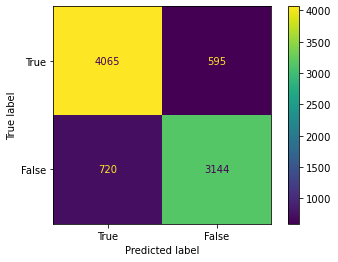

In [90]:
bi_LSTM_report=metrics.classification_report(y_pred1,y_test,output_dict=True)
bi_LSTM_report=pd.DataFrame(bi_LSTM_report).transpose()
bi_LSTM_report.to_csv('bi_LSTM_report.csv',index=False)



disp=metrics.ConfusionMatrixDisplay(cm,display_labels=["True","False"])
print("Confusion matrix for bi-LSTM model on test data ")
disp.plot()
plt.show()




In [91]:
bi_LSTM_report

,precision,recall,f1-score,support
0,0.872318,0.849530,0.860773,4785.00000
1,0.813665,0.840867,0.827042,3739.00000
accuracy,0.845730,0.845730,0.845730,0.84573
macro avg,0.842991,0.845198,0.843907,8524.00000
weighted avg,0.846590,0.845730,0.845977,8524.00000


In [92]:
np.save('y_pred_deep.npy',y_pred1)

### Testing the results

In [93]:
one_hot.save("one_hot_deep.keras")

AttributeError: 'function' object has no attribute 'save'

In [94]:
onehot_dict={}
for words in corpus:
    onehot_dict[words] = one_hot(words, voc_size)
    
onehot_df = pd.DataFrame(onehot_dict)
onehot_df.to_csv('onehot_deep.csv', index=False)

ValueError: All arrays must be of the same length

In [97]:
def cleaninput(string):
    text = string.lower().split()
    text = " ".join(text)
    text = re.sub(r"http(\S)+",' ',text)    
    text = re.sub(r"www(\S)+",' ',text)
    text = re.sub(r"&",' and ',text)  
    tx = text.replace('&amp',' ')
    text = re.sub(r"[^0-9a-zA-Z]+",' ',text)
    text = text.split()
    text = [ps.stem(w) for w in text if not w in stop]
    text = " ".join(text)
    return text
    

In [124]:
text='claim stated india top business conglomerate tata group chairman ratan tata said time think profits think survival'

text=[cleantext(text)]
onehot_text=[one_hot(words,voc_size)for words in text]
embedded_text=pad_sequences(onehot_text,padding='pre',maxlen=400)

In [125]:
embedded_text

array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0, 

In [126]:
text_pred1=(model1.predict(embedded_text) > 0.5).astype("int32")

1/1 [==============================] - 0s 96ms/step


In [127]:
text_pred1

array([[1]])

In [123]:
entire.iloc[1]['Text']

'claim stated india top business conglomerate tata group chairman ratan tata said time think profits think survival'